# Introduction
This is a notebook that will help to get started with the [Pose bowl: detection track competition participation](https://www.drivendata.org/competitions/260/spacecraft-detection/page/833/).

> In this challenge, you will help to develop new methods for conducting spacecraft inspections by identifying the boundaries of a target spacecraft in an image.The challenge consists of a spacecraft detection track and a pose estimation track. In the spacecraft detection track (that's this one!) your task will be to draw bounding boxes around the spacecraft in an image.

### Objective
This notebook is focused on getting started to use ultralytics yolo and fine tune it on this custom spaceship object detection task. This will only help you to get started and get scores better than benchmark but not win!

## Import libraries and packages

%load_ext autoreload
%autoreload 2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
%pip install ultralytics
%pip install -U ipywidgets

### verify installation

# Custom Dataset preparation
Below we will copy the dataset definition yaml file and modify it to be ready to use for trainign wil ultralytics yolo package.

## Create dataset directory
Ultralytics Yolo expects the dataset yaml file to be present on *workspace/dataset* directory.
In our case we will create */kaggle/working/dataset* directory and copy the spaceship.yaml file to this location. For more information  please visit the [ultralytics documentation](https://docs.ultralytics.com/datasets/detect/#supported-dataset-formats).

In [1]:
import os
import tarfile

# Get the current working directory's full path
current_working_directory = os.getcwd()
# Extract the folder name from the full path
current_folder_name = os.path.basename(current_working_directory)
# Print the current folder name
print("The current folder name is:", current_folder_name)

# # Define the source directory containing the .tar files and the target directory for extracted files
# source_dir = 'Dataset_spacecraft_pose_object_detection'
# target_dir = 'data_dev'
# # Create the target directory if it doesn't exist
# os.makedirs(target_dir, exist_ok=True)
# # Walk through the source directory
# for root, dirs, files in os.walk(source_dir):
#     for file in files:
#         # Check if the file is a .tar file
#         if file.endswith('.tar'):
#             # Construct the full path to the .tar file
#             tar_path = os.path.join(root, file)
#             print(f'Extracting {tar_path} to {target_dir}')
#             # Open the .tar file
#             with tarfile.open(tar_path) as tar:
#                 # Extract its contents into the target directory
#                 tar.extractall(path=target_dir)


The current folder name is: spacecraft-pose-object-detection-runtime


In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights


Transferred 355/355 items from pretrained weights


### Modify to add correct path
We will perform the following
* Change the base path to read the dataset directly from */kaggle/input/posebowl/spaceship*
* Add test split 

In [3]:
!pip install pyyaml
!pip install tqdm


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Train

In [4]:
import torch

train_params = {
    "data":'spacecraft.yaml',  # Path to your dataset configuration file
    "imgsz":640,
    "epochs":3,
    "fraction":0.1,
    "batch":64,
    "device":'cpu',
    "project":"finetune",
    "freeze":20,
    "plots":True
}

# Start the training process
results = model.train(**train_params)


New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.37 🚀 Python-3.10.12 torch-2.2.2+cu121 CPU (AMD Ryzen 7 7730U with Radeon Graphics)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=spacecraft.yaml, epochs=3, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=finetune, name=train28, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=0.1, profile=False, freeze=20, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning /mnt/c/Python_work/spacecraft-pose-object-detection-runtime/data_dev/train/labels.cache... 2064 images, 0 backgrounds
val: Scanning /mnt/c/Python_work/spacecraft-pose-object-detection-runtime/data_dev/val/labels.cache... 5161 images, 0 backgrounds, 0 
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to finetune/train28/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to finetune/train28
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.461      3.397      1.301         23        640: 100%|██████████| 33/33 [10:42<00:00, 19.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [18:41<00:00, 27.36s


                   all       5161       5161      0.779      0.108      0.276      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.508      2.706      1.366         32        640: 100%|██████████| 33/33 [09:29<00:00, 17.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [17:49<


                   all       5161       5161      0.278      0.249      0.209      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G        1.5      2.416      1.347         24        640: 100%|██████████| 33/33 [09:43<00:00, 17.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [18:45<


                   all       5161       5161      0.462       0.46      0.392      0.217

3 epochs completed in 1.422 hours.
Optimizer stripped from finetune/train28/weights/last.pt, 6.2MB
Optimizer stripped from finetune/train28/weights/best.pt, 6.2MB

Validating finetune/train28/weights/best.pt...
Ultralytics YOLOv8.1.37 🚀 Python-3.10.12 torch-2.2.2+cu121 CPU (AMD Ryzen 7 7730U with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [16:42<


                   all       5161       5161      0.462      0.459      0.392      0.217
Speed: 2.5ms preprocess, 84.6ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to finetune/train28


In [3]:
from ultralytics import YOLO

# Initialize and load the model with weights in one line
model = YOLO('yolov8n.yaml').load('finetune/train20/weights/best.pt')

# Ensure the model is in evaluation mode if doing inference
model.eval()

# Move the model to the appropriate device
model.to('cuda' if torch.cuda.is_available() else 'cpu')


FileNotFoundError: [Errno 2] No such file or directory: 'finetune/train20/weights/best.pt'

### Evaluate on test dataset

We can see that the mAP50 has increased to 0.438 with just 3 epoch of training.
Training for longer period will definitely increase it upwards of 0.5.

# Visualize results

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
#import cv2
def plot_image_with_bbox(image_path, results):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for result in results:
            for box in result.boxes:
                left, top, right, bottom = np.array(box.xyxy.cpu(), dtype=np.int64).squeeze()
                width = right - left
                height = bottom - top
                center = (left + int((right-left)/2), top + int((bottom-top)/2))
                label = results[0].names[int(box.cls)]
                confidence = float(box.conf.cpu())
                #cv2.rectangle(img, (left, top),(right, bottom), (255, 0, 0), 2)
                #cv2.putText(img, label,(left, bottom+20),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1, cv2.LINE_AA)
                rect = patches.Rectangle((left, top), width, height, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                
    plt.axis('off')  # Turn off axis
    plt.show()


image 1/1 /mnt/c/Python_work/spacecraft-pose-object-detection-runtime/data_dev/train/images/000dbf763348037b46558bbcb6a032ac.png: 512x640 1 spacecraft0, 57.6ms
Speed: 1.7ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


NameError: name 'l' is not defined

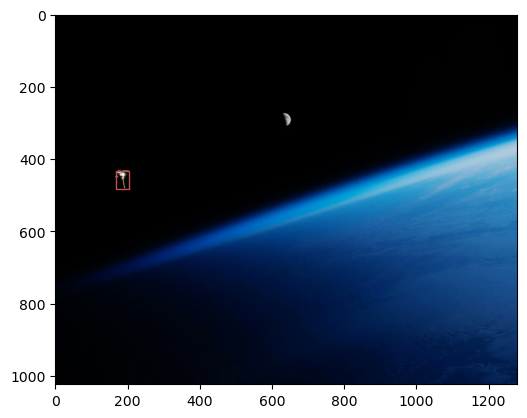

In [11]:

filename = 'data_dev/train/images/000dbf763348037b46558bbcb6a032ac.png'
# Run inference on with default arguments using finetuned model
res_tuned = model.predict(filename, imgsz=640)
plot_image_with_bbox(filename, res_tuned)


Transferred 355/355 items from pretrained weights

image 1/1 /mnt/c/Python_work/spacecraft-pose-object-detection-runtime/data_dev/train/images/000dbf763348037b46558bbcb6a032ac.png: 512x640 (no detections), 70.9ms
Speed: 1.5ms preprocess, 70.9ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


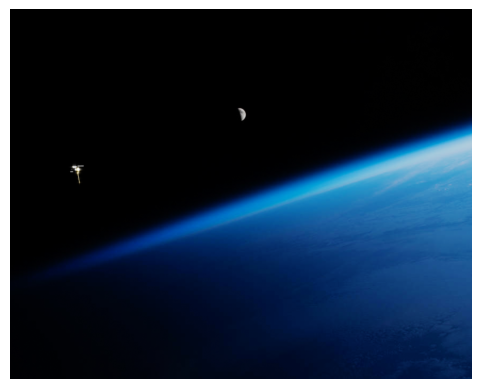

In [8]:
# compare with the pretrained model off the shelf
orig = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights
res_tuned = orig.predict(filename, imgsz=640)
plot_image_with_bbox(filename, res_tuned)

In [9]:
PROJ_DIRECTORY = Path.cwd()
!cd {PROJ_DIRECTORY} && make pull

NameError: name 'Path' is not defined

In [ ]:
!docker images | grep spacecraft-pose-object-detection

In [ ]:
!cd {PROJ_DIRECTORY} && make pack-benchmark

In [ ]:
!cd {PROJ_DIRECTORY} && make test-submission

We also provide a scoring script that computes your score using the same calculation that's used for the public leaderboard. You can generate a score for your local testing with a command like the one below. Remember that this score will be computed on your local test set, and your score on the public leaderboard will be based on an unseen test set.

python scripts/score.py submission/submission.csv data/test_labels.csv

# Next steps
To achieve better results one could try the following individuall or combine them
- Train for longer time
- Hyper paramter tuning(Unfreeze few more layers, drop out. etc)
- Data augumentation
- Other model (bigger model will help IOU but maynot satisfy realtime constraint; try first 3 before )

Thanks for viewing this notebook. Hopefully it was helpful and please upvote if this notebook was useful or helped you to get started. Enjoy the competition 🚀